In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Classification Datasets/Various Datasets/titanic_train.csv")

In [3]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


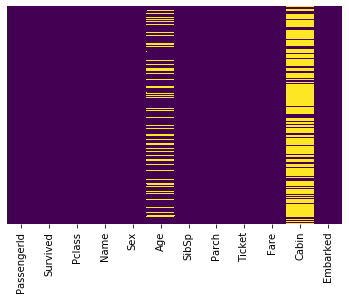

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

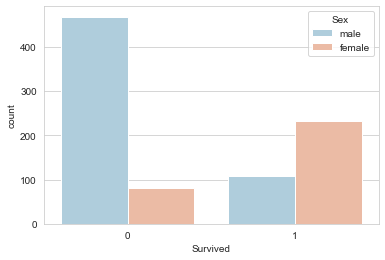

In [6]:
#count plot of people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

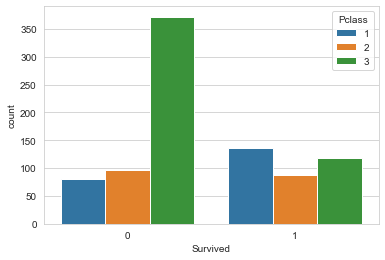

In [7]:
#no: of people who survived according to their passinger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

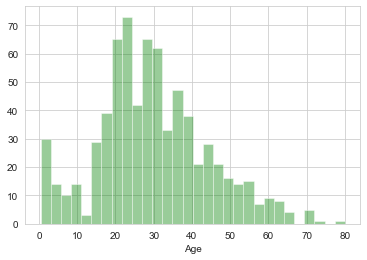

In [8]:
#distribution plot of age of the people
sns.distplot(train['Age'].dropna(),kde=False,bins=30,color='Green')

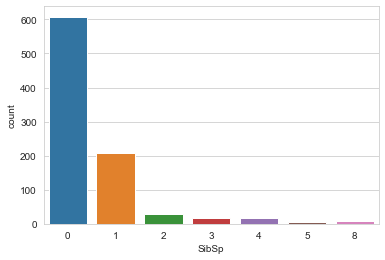

In [9]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train)

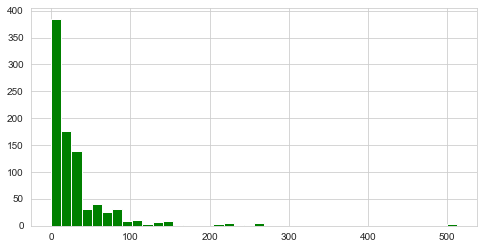

In [10]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

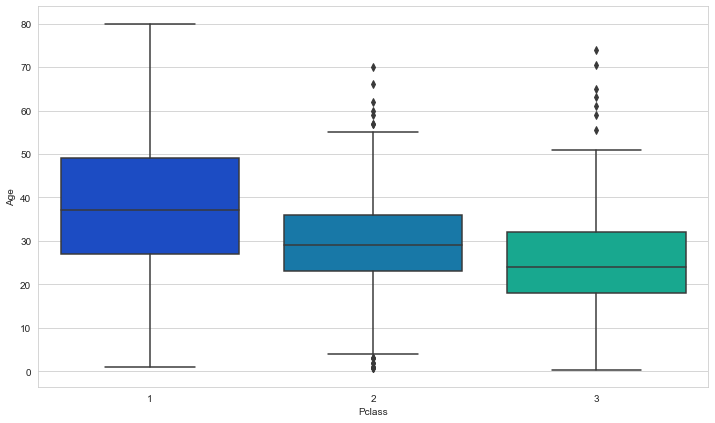

In [11]:
# Data Cleaning....!

#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette = 'winter')

In [12]:
# Function to replace the age values with the means according to the class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

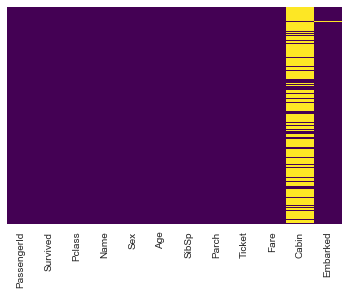

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False, cmap = 'viridis')

In [15]:
# Dropping the complete NA columns or the NA rows(if they are new in number)
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
# Converting Categorical Features
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name'],axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,22.0,1,0,A/5 21171,7.2500
1,2,1,1,38.0,1,0,PC 17599,71.2833
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,35.0,1,0,113803,53.1000
4,5,0,3,35.0,0,0,373450,8.0500


In [20]:
train = pd.concat([train,sex,embark],axis=1)

In [21]:
train.drop(['Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
train.count()

PassengerId    889
Survived       889
Pclass         889
Age            889
SibSp          889
Parch          889
Fare           889
male           889
Q              889
S              889
dtype: int64

In [23]:
# Split data for training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
           train['Survived'], test_size=0.30, 
            random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train, y_train)

C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#predictions
Predictions = logmodel.predict(X_test)

In [26]:
# Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Predictions)

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [28]:
from sklearn import metrics

In [29]:
metrics.accuracy_score(y_test,Predictions)

0.797752808988764